---


#<big> <b>**SOLICITUDES DE AUTORIZACIÓN DE PORTACIÓN DE ARMAS EN ARGENTINA - (2016-2025)**</b></big>

---



Fuente: [https://datos.gob.ar/dataset/justicia-solicitudes-autorizacion-portacion-armas-fuego](https://datos.gob.ar/dataset/justicia-solicitudes-autorizacion-portacion-armas-fuego)

Este análisis tiene como objetivo explorar y comprender las tendencias en las solicitudes de portación de armas en Argentina durante el período 2016-2025, desglosando los datos por tiempo, género y rango etario.

Los datos son del Ministerio de Justicia, Agencia Nacional de Materiales Controlados - ANMaC, Coordinación de Sistemas y fueron obtenidos de [datos.gob.ar](https://www.datos.gob.ar), contiene registros de solicitudes oficiales de portación de armas en Argentina desde 2016 hasta 2025. Las variables principales incluyen tipo y número de documento, género, fechas de publicación y vencimiento y descripción del solicitante.

Las preguntas principales de este análisis son:  

*   ¿Cómo varían las solicitudes a lo largo del tiempo?
*   ¿Cuál es la distribución por género de los solicitantes?
*   ¿Qué rangos de edad predominan en las solicitudes?



# **IMPORTACIÓN Y PREPARACIÓN DE DATOS**

##Instalación e importacion de librerias necesarias

In [ ]:
# Instalamos chardet, que luego usaremos para detectar el encondig correcto de nuestro archivo .csv

!pip install chardet

# Librerias para Manipulación de datos
import pandas as pd
import numpy as np
import os
import chardet # Para detectar el tipo de enconding del archivo .csv
import csv # Para detectar el tipo de separador del archivo .csv
from datetime import datetime

# Librerias para Visualización
import matplotlib.pyplot as plt
import seaborn as sns

## Conexion entre Google Drive y Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Definimos la ruta de nuestro archivo

ruta_archivo = '/content/drive/MyDrive/Colab Notebooks/Proyecto-solicitud-armas/solicitudes-autorizacion-portacion-armas-fuego-2016-2025_preprocesado2.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Detección del enconding, separador y Lectura del archivo

In [ ]:
# Detectamos enconding

# Leemos una parte del archivo en modo binario

with open(ruta_archivo, 'rb') as f:
    resultado = chardet.detect(f.read(100000))  # lee los primeros 100 KB

encoding_detectado = resultado['encoding']

print("Encoding detectado:", encoding_detectado)

# Detectamos separador

with open(ruta_archivo, 'r', encoding=encoding_detectado) as f:
    muestra = f.read(4096)  # Leer una muestra del archivo

dialecto = csv.Sniffer().sniff(muestra)
separador_detectado = dialecto.delimiter

print("Separador detectado:", repr(separador_detectado))

# Lectura de archivo con Pandas

df_armas = pd.read_csv(ruta_archivo, encoding=encoding_detectado, sep=separador_detectado)

print("\nArchivo cargado con éxito:")

df_armas.head()

Encoding detectado: ISO-8859-1
Separador detectado: ';'

Archivo cargado con éxito:


,tipo_documento,documento,apellidos,nombres,fecha_publicacion,fecha_vencimiento,descripcion,genero
0,DNI,10224691.0,ABEL,AURELIO CESAR,1/11/2016,15/11/2016,solicitud de autorizacion de portacion de arma...,sin datos
1,DNI,22388933.0,ACOSTA,SERGIO OSCAR,1/11/2016,15/11/2016,solicitud de autorizacion de portacion de arma...,sin datos
2,DNI,4534719.0,AGUILAR,NICASIO DOMINGO,1/11/2016,15/11/2016,solicitud de autorizacion de portacion de arma...,sin datos
3,DNI,11455749.0,AGUIRRE,RAMON ANTONIO,1/11/2016,15/11/2016,solicitud de autorizacion de portacion de arma...,sin datos
4,DNI,29905635.0,ALEGRE HOENIGFELD,JUAN MANUEL,1/11/2016,15/11/2016,solicitud de autorizacion de portacion de arma...,sin datos


Mas adelante vamos agregar 2 columnas mas para sacar la fecha aproximada de nacimiento y la edad aproximada dependiendo del DNI

## ¿Cuantas variables y observaciones tenemos en nuestro dataset?

In [ ]:
df_armas.shape

(227699, 8)

Esto nos dice que tenemos en total 227699 fila y 8 columnas

##Veamos un pantallazo general de la informacion de nuestro dataset

In [ ]:
df_armas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227699 entries, 0 to 227698
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tipo_documento     220630 non-null  object 
 1   documento          227673 non-null  float64
 2   apellidos          227699 non-null  object 
 3   nombres            227699 non-null  object 
 4   fecha_publicacion  227699 non-null  object 
 5   fecha_vencimiento  227699 non-null  object 
 6   descripcion        227699 non-null  object 
 7   genero             227699 non-null  object 
dtypes: float64(1), object(7)
memory usage: 13.9+ MB


Aqui detectamos que tenemos variables que les faltan datos

## ¿Existen valores nulos explicitos en nuestro data set? ¿Que columnas tienen valores nulos? ¿Que cantidad de valores nulos tenemos por columna y en total? ¿Cual es la proporcion de valores nulos en nuestro data set?

In [ ]:
# Valores nulos explicitos por columna

(
    df_armas
    .isna()
    .any()
)

,0
tipo_documento,True
documento,True
apellidos,False
nombres,False
fecha_publicacion,False
fecha_vencimiento,False
descripcion,False
genero,False


In [ ]:
# Cantidad de valores nulos por variable o columna

(
    df_armas
    .isna()
    .sum()
)

,0
tipo_documento,7069
documento,26
apellidos,0
nombres,0
fecha_publicacion,0
fecha_vencimiento,0
descripcion,0
genero,0


In [ ]:
# Cantidad total de valores nulos en nuestro data set

(
    df_armas
    .isna()
    .sum()
    .sum()
)

np.int64(7095)

In [ ]:
# Porcentaje de valores nulos

(df_armas.isna().sum() / df_armas.shape[0]) * 100

,0
tipo_documento,3.104537
documento,0.011419
apellidos,0.000000
nombres,0.000000
fecha_publicacion,0.000000
fecha_vencimiento,0.000000
descripcion,0.000000
genero,0.000000


Esto nos dice que tenemos menos del 5% de valores nulos en nuestro data set

## Veamos la proporcion de los valores nulos en nuestro data set de forma visual

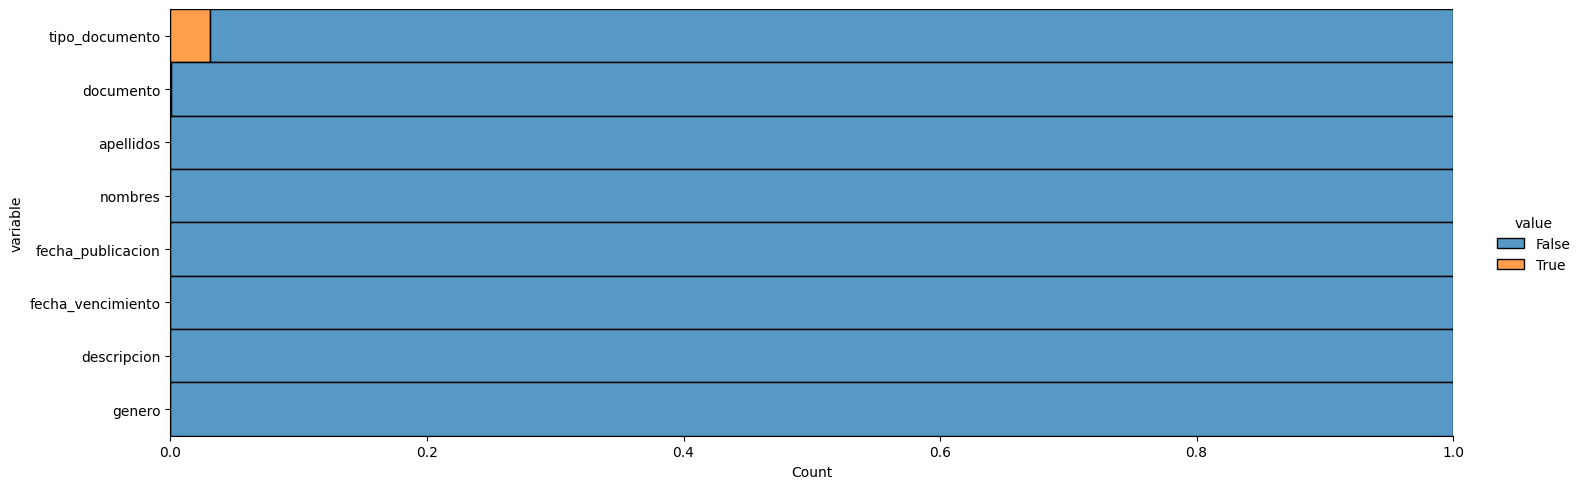

In [ ]:
(
    df_armas
    .isna()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect = 3
            )
        )
    )
)

## Otra grafica para visualizar los valores nulos en el dataset

<Axes: >

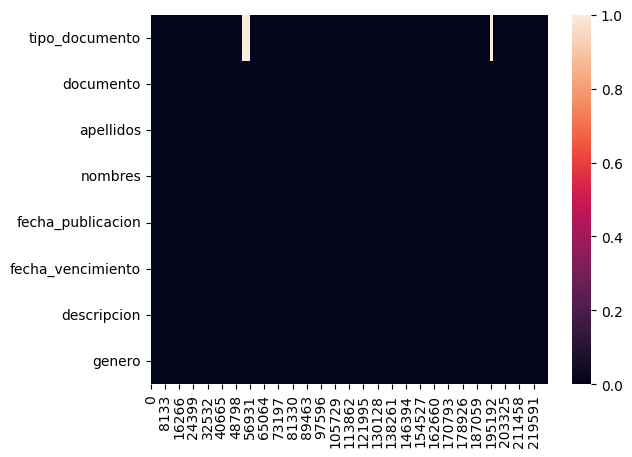

In [ ]:
# la"T" es lo mismo que poner transpose() osea la funcion transpuesta
(
    df_armas
    .isna()
    .T
    .pipe(
        lambda df:(
            sns.heatmap(
                data=df
            )
        )
    )
)

## Tratamiento de Valores Nulos

Como se analizó anteriormente, el dataset presenta un porcentaje muy bajo de valores nulos, representando menos del 5% del total. Estos valores faltantes se encuentran únicamente en las columnas *tipo_documento* y *documento*.

Dado que no representan una proporción significativa y no impactan directamente en las variables clave de nuestro análisis, consideramos que pueden ser descartados o tratados como datos despreciables para esta etapa del estudio.

## Nuevas variables derivadas

Con el objetivo de enriquecer el análisis y obtener una perspectiva aproximada de la edad de los solicitantes, vamos a incorporar dos nuevas columnas al dataset:



*   fecha_nacimiento_aproximada: calculada de manera estimativa a partir del número de documento (documento), con una formula sacada desde un sitio web
*   edad_aproximada: obtenida a partir de la diferencia entre el año actual y la fecha_nacimiento_aproximada.


Cabe aclarar que ambas variables son aproximadas y se utilizan únicamente con fines exploratorios, ya que la verdadera fecha de nacimiento no se encuentra disponible en el dataset.

## Tratamiento y limpieza de valores nulos

In [ ]:
# Limpieza de datos
# Quitamos los valores nulos
# definimos una nueva variable para el data frame sin nulos

df_armas_notnull= (
    df_armas
    .dropna()
    .reset_index(drop=True)
)

# ¿Cuantos filas/valos nulos elimine en total?

print("Antigua dimension", df_armas.shape)
print("Nueva dimension", df_armas_notnull.shape)
print("Cantidad de filas con valores nulos:", df_armas.shape[0] - df_armas_notnull.shape[0])

Antigua dimension (227699, 8)
Nueva dimension (220604, 8)
Cantidad de filas con valores nulos: 7095


In [ ]:
df_armas_notnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220604 entries, 0 to 220603
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tipo_documento     220604 non-null  object 
 1   documento          220604 non-null  float64
 2   apellidos          220604 non-null  object 
 3   nombres            220604 non-null  object 
 4   fecha_publicacion  220604 non-null  object 
 5   fecha_vencimiento  220604 non-null  object 
 6   descripcion        220604 non-null  object 
 7   genero             220604 non-null  object 
dtypes: float64(1), object(7)
memory usage: 13.5+ MB


In [ ]:
df_armas_notnull.describe(include='all')

,tipo_documento,documento,apellidos,nombres,fecha_publicacion,fecha_vencimiento,descripcion,genero
count,220604,2.206040e+05,220604,220604,220604,220604,220604,220604
unique,3,NaN,23122,24157,823,823,1,4
top,DNI,NaN,GONZALEZ,JUAN CARLOS,7/4/2025,7/4/2025,solicitud de autorizacion de portacion de arma...,masculino
freq,220060,NaN,3230,2858,1555,1555,220604,173868
mean,NaN,2.305205e+07,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,9.663929e+06,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,4.015000e+03,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.683735e+07,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.272102e+07,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.844026e+07,NaN,NaN,NaN,NaN,NaN,NaN


#**ANÁLISIS EXPLORATORIO**

## Analizamos las variables que en teoria son categoricas

In [ ]:
# Para tipo_documento

print("Valores únicos en tipo_documento:\n")
print(df_armas_notnull['tipo_documento'].unique())

print("\nProporcion de los valores en tipo docmento\n")
print(df_armas_notnull['tipo_documento'].value_counts(normalize=True) * 100)

# Para genero

print("\nValores únicos en genero:\n")
print(df_armas_notnull['genero'].unique())

print("\nProporcion de los valores en genero\n")
print(df_armas_notnull['genero'].value_counts(normalize=True) * 100)

# Para descripcion

print("\nValores únicos en descripcion:\n")
print(df_armas_notnull['descripcion'].unique())


Valores únicos en tipo_documento:

['DNI' 'LE' 'REN']

Proporcion de los valores en tipo docmento

tipo_documento
DNI    99.753404
LE      0.245689
REN     0.000907
Name: proportion, dtype: float64

Valores únicos en genero:

['sin datos' 'masculino' 'femenino' 'no especificado']

Proporcion de los valores en genero

genero
masculino          78.814527
sin datos          19.432105
femenino            1.631883
no especificado     0.121485
Name: proportion, dtype: float64

Valores únicos en descripcion:

['solicitud de autorizacion de portacion de armas de fuego']


## Transformacion y Limpieza de datos

En este paso vamos a eliminar las columnas que no vamos a usar para un analisis exploratorio mas limpio

In [ ]:
# Eliminamos columnas que no vamos a usar

df_armas_notnull_processed = df_armas_notnull.drop(['apellidos', 'nombres', 'fecha_vencimiento', 'descripcion'], axis=1, inplace=False)

# Filtramos solos los datos que contengan el tipo docuento "DNI"

df_armas_notnull_processed = df_armas_notnull_processed[df_armas_notnull_processed['tipo_documento'] == 'DNI'].copy()

df_armas_notnull_processed.head().reset_index(drop=True)


,tipo_documento,documento,fecha_publicacion,genero
0,DNI,10224691.0,1/11/2016,sin datos
1,DNI,22388933.0,1/11/2016,sin datos
2,DNI,4534719.0,1/11/2016,sin datos
3,DNI,11455749.0,1/11/2016,sin datos
4,DNI,29905635.0,1/11/2016,sin datos


In [ ]:
# Agregamos y calculamos la columna nueva "fecha_nacimiento_aproximada_año"

df_armas_notnull_processed['fecha_nacimiento_aproximada_año'] = (
    1942.5 + (df_armas_notnull_processed['documento'] / 736470)
)

La formula que usamos para sacar la fecha de nacimiento aproximada, la sacamos de reddit, puede que no sea la mejor y que cause algunos errores a la hora de hacer el analisis

In [ ]:
# Agregamos y calculamos la columna nueva "edad_aproximada"

año_actual = datetime.now().year

df_armas_notnull_processed['edad_aproximada'] = (
    año_actual - df_armas_notnull_processed['fecha_nacimiento_aproximada_año']
).round(0).astype('Int64')

In [ ]:
df_armas_notnull_processed.head()

,tipo_documento,documento,fecha_publicacion,genero,fecha_nacimiento_aproximada_año,edad_aproximada
0,DNI,10224691.0,1/11/2016,sin datos,1956.383377,69
1,DNI,22388933.0,1/11/2016,sin datos,1972.900333,52
2,DNI,4534719.0,1/11/2016,sin datos,1948.657371,76
3,DNI,11455749.0,1/11/2016,sin datos,1958.054943,67
4,DNI,29905635.0,1/11/2016,sin datos,1983.106725,42


## Nuestro nuevo data frame con solo personas mayores a 18 años

tuvimos que aplicar este filtro, porque la formula que usamos para clacular la fecha de nacimiento no es muy precisa y puede traer errores

tambien reseteamos el index

In [ ]:
df_mayores_18 = df_armas_notnull_processed[df_armas_notnull_processed['edad_aproximada'] >= 18].reset_index(drop=True)

## Dejamos nuestro dataframe lo mas limpio posible, solo con las columas que realmente vamos a usar para el analisis

In [ ]:
df_mayores_18 = df_mayores_18.drop(['fecha_nacimiento_aproximada_año', 'documento'], axis=1, inplace=False)

In [ ]:
df_mayores_18.head()

,tipo_documento,fecha_publicacion,genero,edad_aproximada
0,DNI,1/11/2016,sin datos,69
1,DNI,1/11/2016,sin datos,52
2,DNI,1/11/2016,sin datos,76
3,DNI,1/11/2016,sin datos,67
4,DNI,1/11/2016,sin datos,42


## Transformamos fecha_publicacion a tipo datetime

In [ ]:
df_mayores_18['fecha_publicacion'] = pd.to_datetime(df_mayores_18['fecha_publicacion'], dayfirst=True)


## Hacemos un pequeño estudio sobre el rango de las fecha de publicacion

In [ ]:
print("\nFecha de la primera solicitud:\n")
print(df_mayores_18['fecha_publicacion'].min())

print("\nFecha de la ultima solicitud:\n")
print(df_mayores_18['fecha_publicacion'].max())


Fecha de la primera solicitud:

2016-11-01 00:00:00

Fecha de la ultima solicitud:

2025-05-25 00:00:00


## Tabla filtrada para las fecha publicadas menos a 2025-05-31

In [ ]:
# Filtramos las filas con fecha anterior al 31 de mayo de 2025

#df_filtrado = df_mayores_18[df_mayores_18['fecha_publicacion'] < '2025-05-31']

In [ ]:
df_filtrado.head()

,tipo_documento,fecha_publicacion,genero,edad_aproximada,año_mes,rango_edad,año,mes
0,DNI,2016-11-01,sin datos,69,2016-11,61-75,2016,11
1,DNI,2016-11-01,sin datos,52,2016-11,46-60,2016,11
2,DNI,2016-11-01,sin datos,76,2016-11,76-90,2016,11
3,DNI,2016-11-01,sin datos,67,2016-11,61-75,2016,11
4,DNI,2016-11-01,sin datos,42,2016-11,31-45,2016,11


#Visualizaciones

###Grafica de solicitudes a lo largo del tiempo

Solicitudes de portacion de armas a los largo del tiempo
periodo: 2016 a 2025

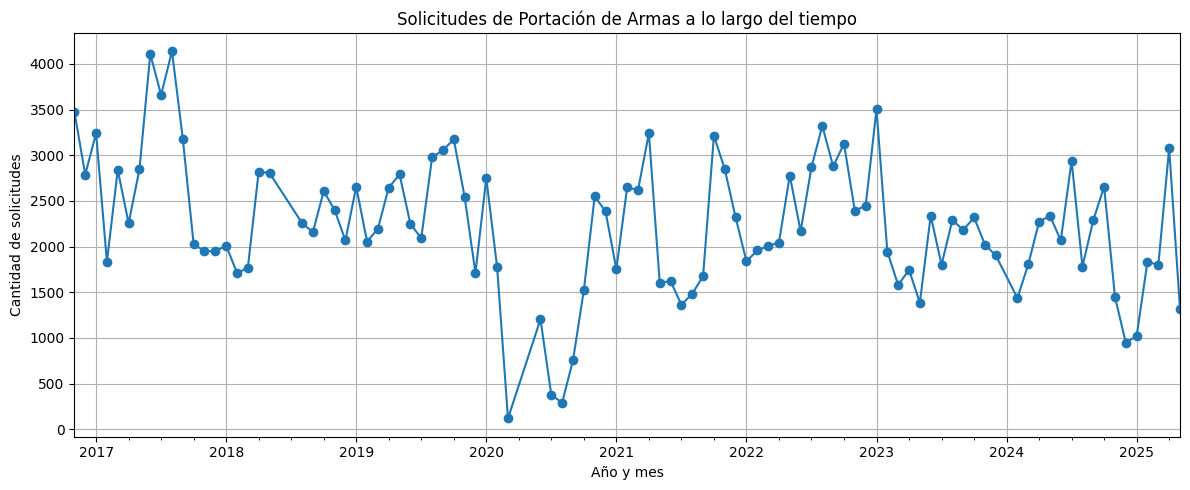

In [ ]:
# Creamos una columna solo con el año y mes
df_filtrado['año_mes'] = df_filtrado['fecha_publicacion'].dt.to_period('M')

# Agrupamos por año_mes y contamos la cantidad de solicitudes
solicitudes_tiempo = df_filtrado.groupby('año_mes').size()

# Visualizamos
solicitudes_tiempo.plot(kind='line', marker='o', figsize=(12, 5), title='Solicitudes de Portación de Armas a lo largo del tiempo')
plt.xlabel('Año y mes')
plt.ylabel('Cantidad de solicitudes')
plt.grid(True)
plt.tight_layout()

###Grafica de solicitudes por año con Seaborn


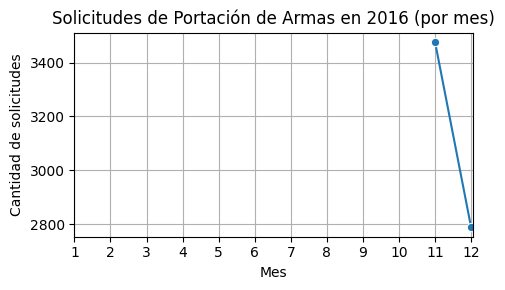

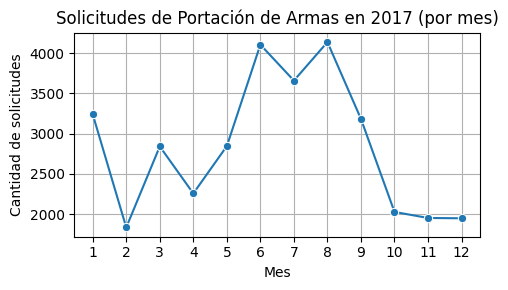

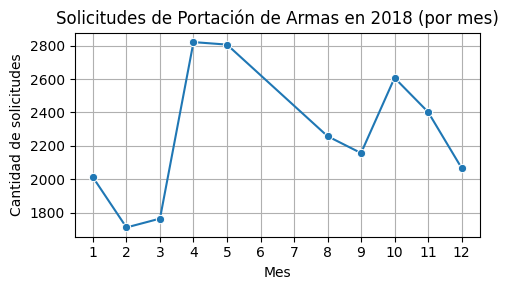

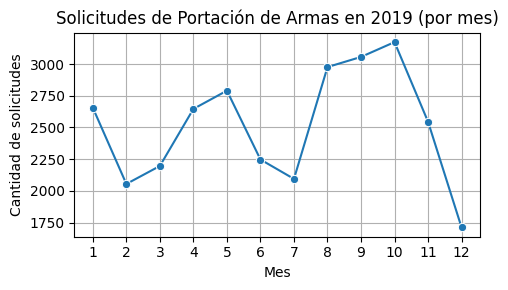

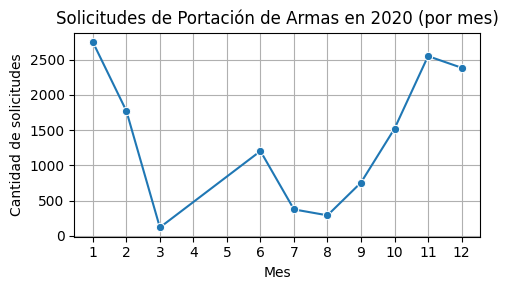

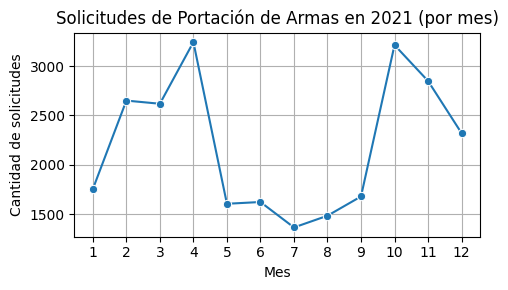

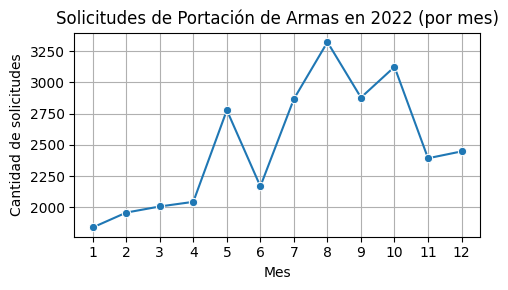

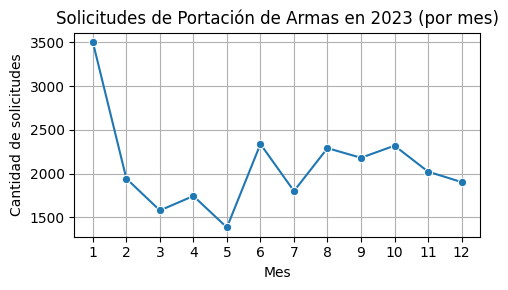

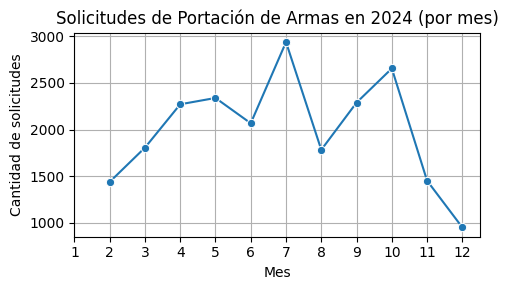

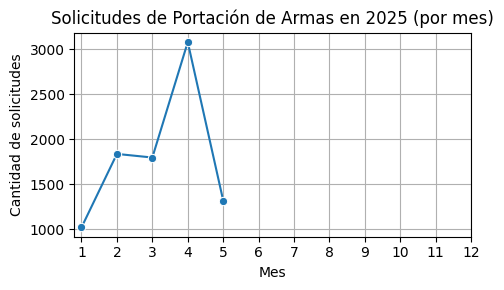

In [ ]:
# Creamos una columna para el año
df_filtrado['año'] = df_filtrado['fecha_publicacion'].dt.year

# Creamos una columna para el mes
df_filtrado['mes'] = df_filtrado['fecha_publicacion'].dt.month

# Obtenemos los años unicos
años_unicos = df_filtrado['año'].unique()

# Ordenamos los años
años_unicos.sort()

# Iteramos sobre cada año y graficamos
for año in años_unicos:
    # Filtramos el DataFrame para el año actual
    df_año = df_filtrado[df_filtrado['año'] == año].copy() # Usamos .copy() para evitar SettingWithCopyWarning

    # Agrupamos por mes y contamos las solicitudes para el año actual
    # Usamos reset_index() para convertir el resultado de groupby en un DataFrame
    solicitudes_por_mes_año = df_año.groupby('mes').size().reset_index(name='cantidad_solicitudes')

    # Creamos el gráfico de línea para el año actual usando seaborn
    plt.figure(figsize=(5, 3))
    sns.lineplot(
        data=solicitudes_por_mes_año,
        x='mes',
        y='cantidad_solicitudes',
        marker='o')

    # Configuramos el título y las etiquetas
    plt.title(f'Solicitudes de Portación de Armas en {año} (por mes)')
    plt.xlabel('Mes')
    plt.ylabel('Cantidad de solicitudes')
    plt.xticks(range(1, 13)) # Aseguramos que se muestren todos los meses (1 a 12)
    plt.grid(True)
    plt.tight_layout() # Ajustamos el diseño

###Grafica de solicitudes por rango de edad - historico

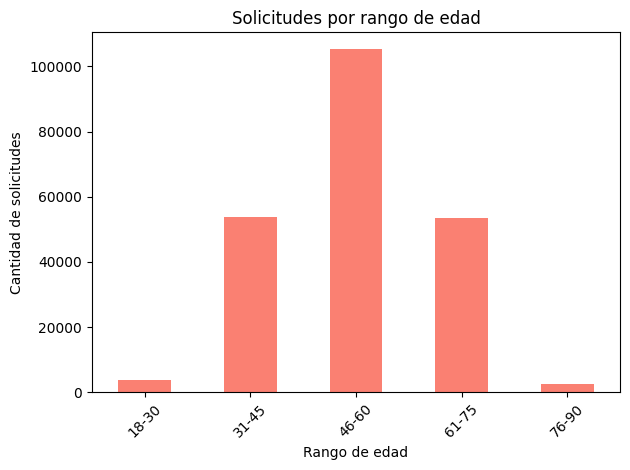

In [ ]:
# Definimos los bins (rangos de edad)
bins = [18, 30, 45, 60, 75, 90]
labels = ['18-30', '31-45', '46-60', '61-75', '76-90']

# Creamos la columna con los rangos de edad
df_filtrado['rango_edad'] = pd.cut(df_filtrado['edad_aproximada'], bins=bins, labels=labels, right=False)

# Contamos cuántos hay por rango
conteo_rango_edad = df_filtrado['rango_edad'].value_counts().sort_index()

# Visualizamos
conteo_rango_edad.plot(kind='bar', color='salmon', title='Solicitudes por rango de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Cantidad de solicitudes')
plt.xticks(rotation=45)
plt.tight_layout()

### Grafica de distribucion de genero de las solicitudes

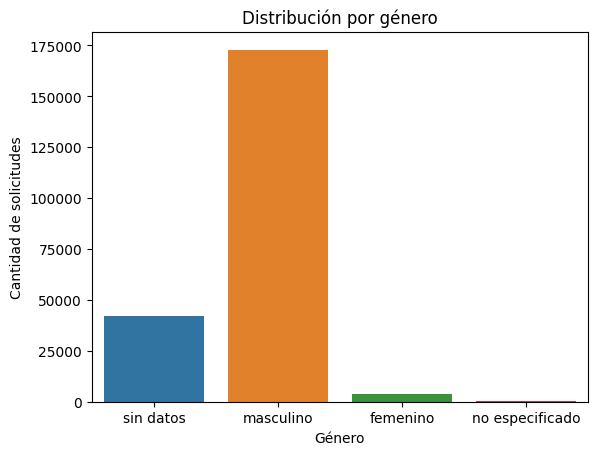

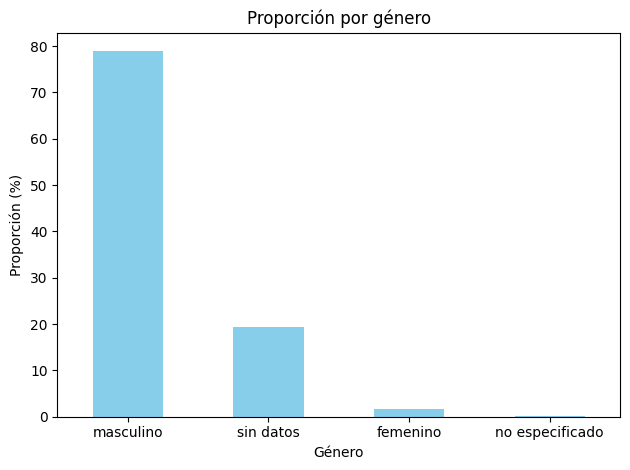

In [ ]:
# Proporción en porcentaje
porcentaje_genero = df_filtrado['genero'].value_counts(normalize=True) * 100

# Grafica de distribucion
sns.countplot(data=df_filtrado, x='genero', hue='genero')
plt.xlabel('Género')
plt.ylabel('Cantidad de solicitudes')
plt.title('Distribución por género')
plt.show()

# Grafica de proporcion
porcentaje_genero.plot(kind='bar', color='skyblue', title='Proporción por género')
plt.ylabel('Proporción (%)')
plt.xlabel('Género')
plt.xticks(rotation=0)
plt.tight_layout()

#**CONCLUSIONES**

Respondiendo a las preguntas que nos propusimos al principio del proyecto:

**¿Cómo varían las solicitudes a lo largo del tiempo?**



*   Las solicitudes de portación de armas no se distribuyen de manera uniforme a lo largo de los años.
*   Se registraron picos notorios de actividad durante ciertos meses de 2017 y 2018, así como una caída abrupta en el año 2020, probablemente asociada a las restricciones derivadas de la pandemia.
*   A partir de 2021, las cifras muestran una tendencia más estable, aunque sin alcanzar los valores máximos de los primeros años.
*   Es posible identificar picos o descensos en determinados años que podrían estar relacionados con contextos políticos, económicos o sociales (como cambios de gobierno, situaciones de inseguridad o crisis sanitarias).

**¿Cuál es la distribución por género de los solicitantes?**



*   El análisis revela una clara predominancia del género masculino, que representa cerca del 80% de las solicitudes.
*   Las solicitudes por parte de mujeres y personas que no especificaron su género son significativamente menores.
*   Este patrón podría estar vinculado a cuestiones culturales, históricas o incluso a roles tradicionales asociados al acceso y uso de armas.

**¿Qué rangos de edad predominan en las solicitudes?**


*   La mayoría de las solicitudes fueron realizadas por personas en el rango de 46 a 60 años, con un promedio general cercano a los 50 años. Esto sugiere que la portación de armas es una gestión más frecuente entre adultos de mediana y avanzada edad.
*   La participación de personas jóvenes (menores de 30 años) es baja, posiblemente debido a requisitos legales, menor necesidad percibida o decisiones personales relacionadas con sus contextos de vida.